In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\yash1\Downloads\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#change some column name for easy understand
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.shape

(8807, 12)

In [5]:
#Dropo description column

df.drop('description',axis=1,inplace=True)
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries


In [6]:
#change some column name for easy understand
df=df.rename(columns={'title':'name','listed_in':'genre','show_id':'seasons'})
df.head(1)
             

,seasons,type,name,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries


In [7]:
missing_prct=(df.isnull().sum()/len(df))*100
missing_prct

seasons          0.000000
type             0.000000
name             0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
genre            0.000000
dtype: float64

In [8]:
#cast,director and country column have less than 50% nan vaues. so fill them with unknown

df['cast'].fillna('unknown',inplace=True)
df['director'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)

C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\3504941874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('unknown',inplace=True)
C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\3504941874.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [9]:
df.dropna(inplace=True)

In [10]:
#extract month from date

df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
df['month']=df['date_added'].dt.month
df['month_name']=df['date_added'].dt.strftime('%b') #extract month name
df.head(1)

,seasons,type,name,director,cast,country,date_added,release_year,rating,duration,genre,month,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,Sep


In [11]:
#filter data set to include only with realse year from 2000 onword

def fix_release_year(values):
    if values >= 2000:
        return values 
    return None  

df['release_year'] = df['release_year'].apply(fix_release_year)
df = df.dropna(subset=['release_year'])  # Remove rows with NaN values
df['release_year'] = df['release_year'].astype(int)  # Convert back to int
df.head(3)


,seasons,type,name,director,cast,country,date_added,release_year,rating,duration,genre,month,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,Sep
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,Sep
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,Sep


C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\3751605203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_tvshow['duration']=count_tvshow['duration'].astype(str).str.split().str[0].astype(int)


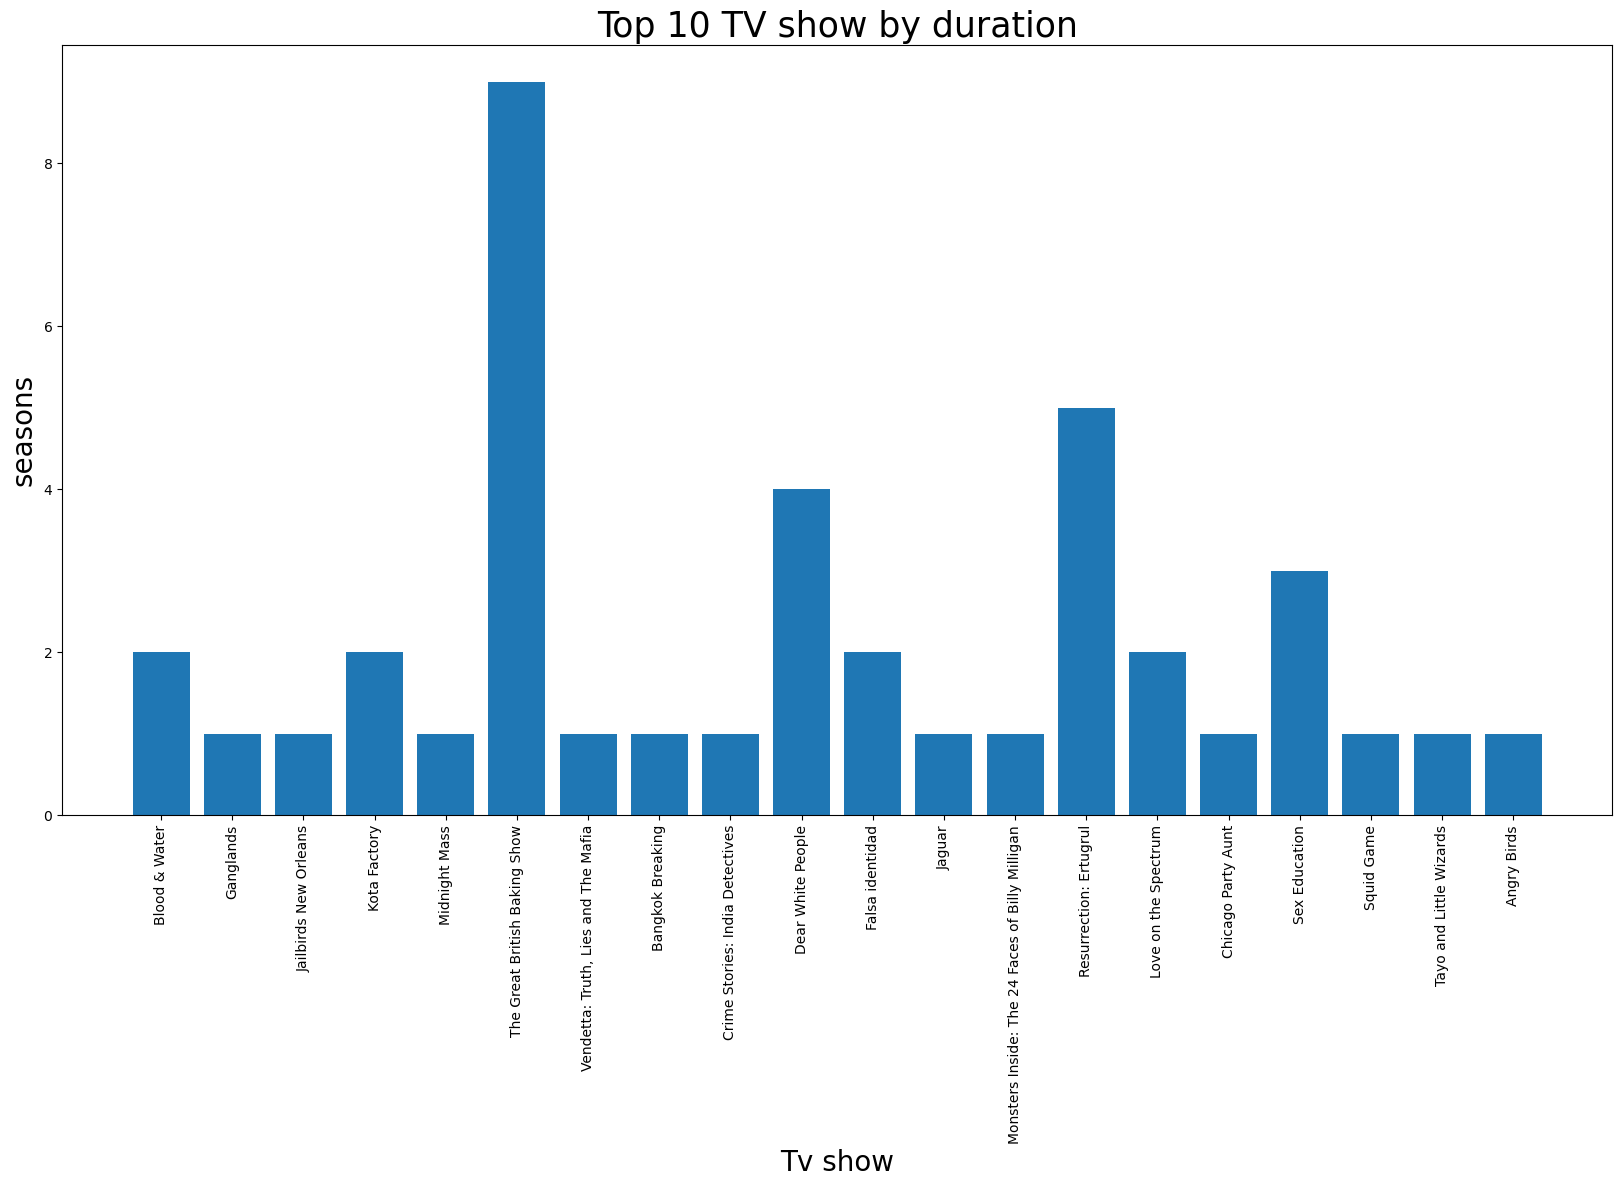

In [12]:
count_tvshow=df.loc[df['type']=='TV Show']
count_tvshow['duration']=count_tvshow['duration'].astype(str).str.split().str[0].astype(int)

count_tvshow.sort_values('duration',ascending=False)

top_10tvshow=count_tvshow.head(20)

plt.figure(figsize=(20,10))
plt.bar(top_10tvshow['name'],top_10tvshow['duration'])
plt.xlabel('Tv show',fontsize=20)
plt.ylabel('seasons',fontsize=20)
plt.xticks(rotation=90)
plt.title('Top 10 TV show by duration',fontsize=25)
plt.show()




C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\1950216364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_movie['duration']=count_movie['duration'].astype(str).str.split().str[0].astype(int)
C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\1950216364.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='duration', data=top_10movies, palette='viridis')


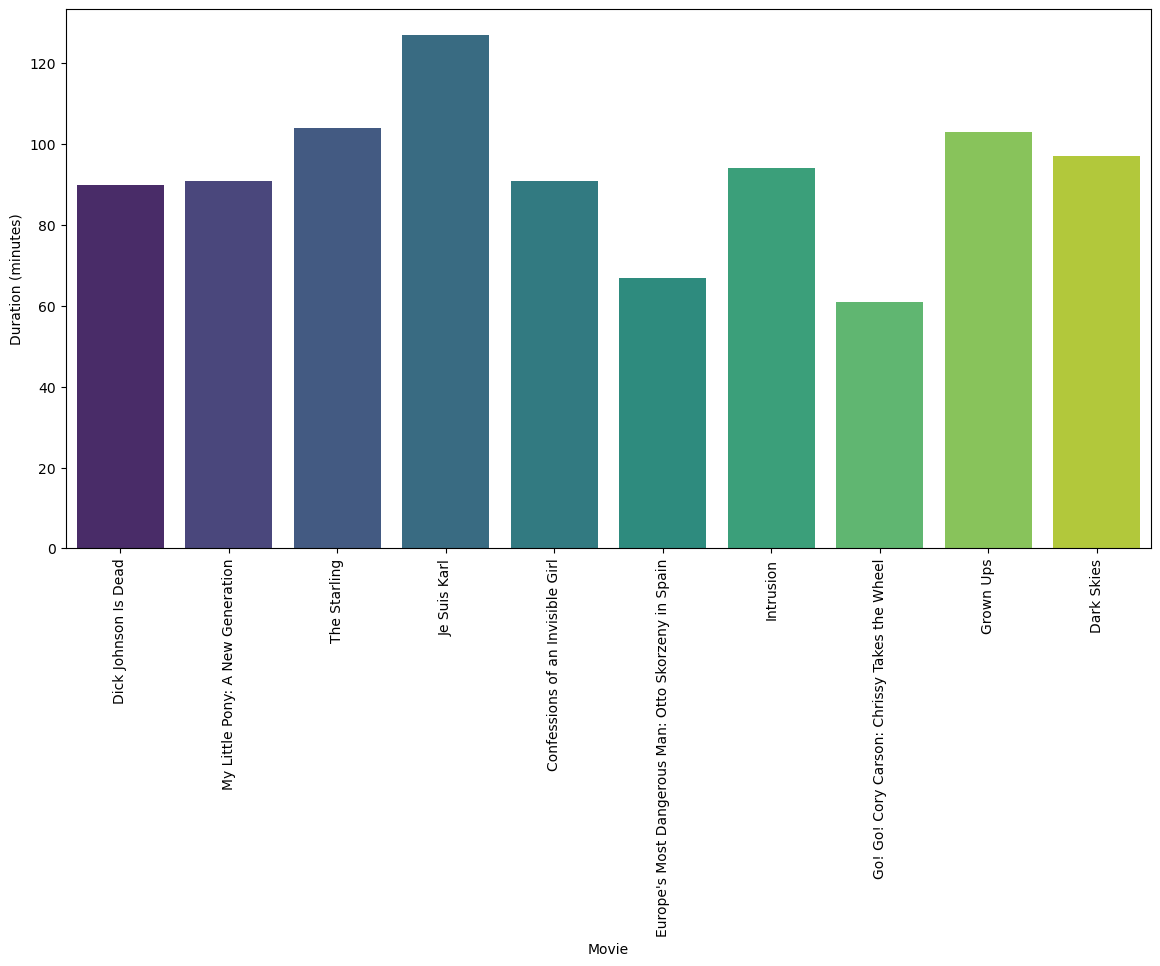

In [311]:
#Top movies by Duration

count_movie=df[df['type']=='Movie']
count_movie['duration']=count_movie['duration'].astype(str).str.split().str[0].astype(int)
count_movie.sort_values(by='duration',ascending=False)

top_10movies=count_movie.head(10)

#ploting bar chart
plt.figure(figsize=(14,7))
sns.barplot(x='name', y='duration', data=top_10movies, palette='viridis')
plt.xlabel('Movie')
plt.ylabel('Duration (minutes)')
plt.tilte=('top movies by durration')
plt.xticks(rotation=90)
plt.show()


C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\394029322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='count', data=count_genre, palette='viridis')


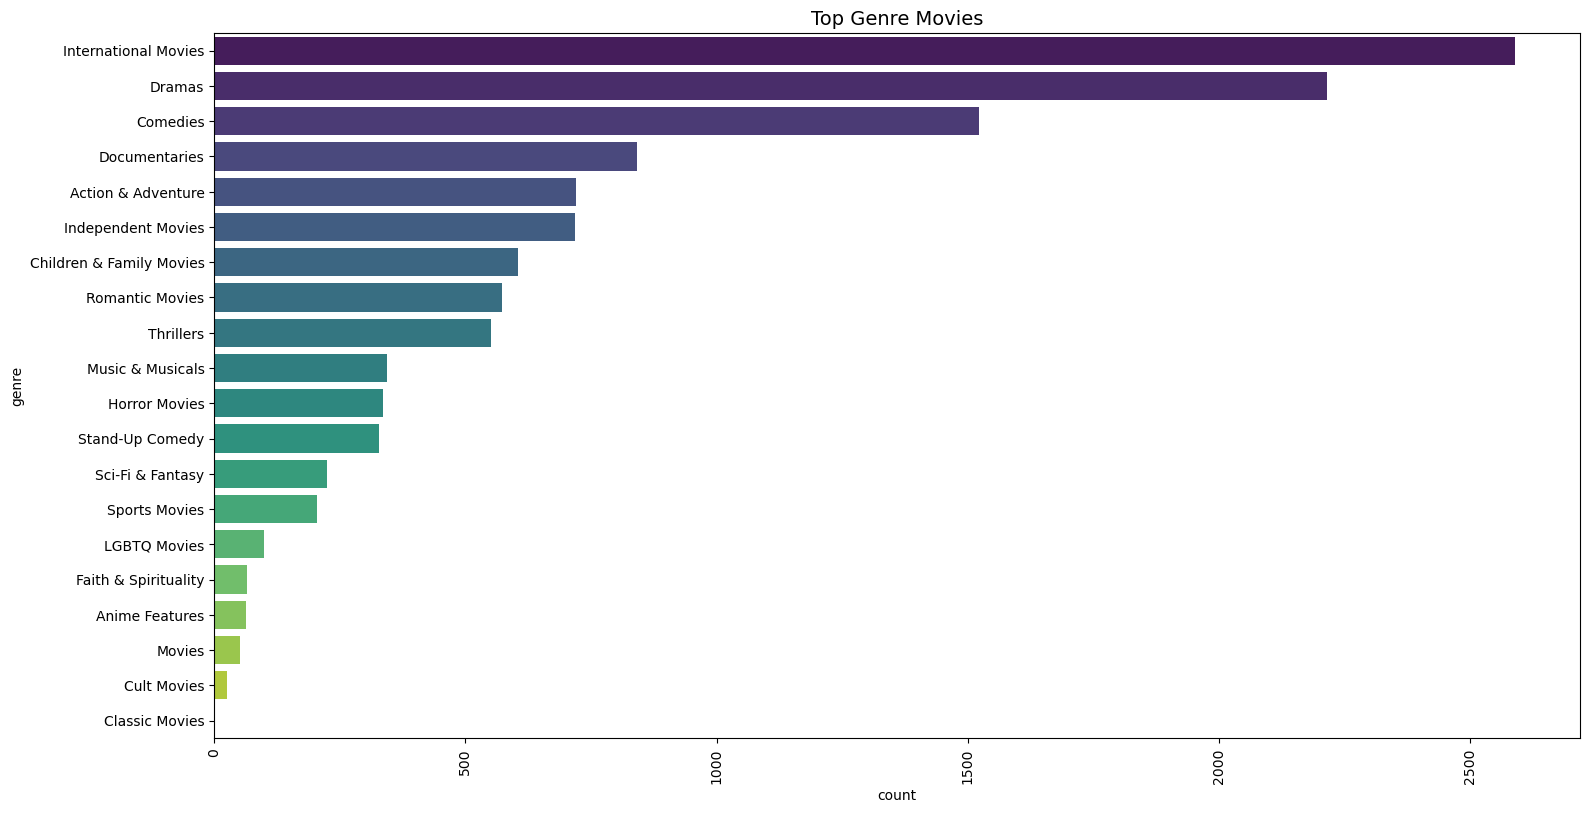

In [305]:

genre_typemovies=df.loc[df['type']=='Movie']
count_genre = genre_typemovies['genre'].str.split(', ').explode()  #convert into  list and after each row
count_genre=count_genre.value_counts().reset_index()

count_genre=pd.DataFrame(count_genre)

plt.figure(figsize=(16,8))
sns.barplot(y='genre', x='count', data=count_genre, palette='viridis')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Top Genre Movies',fontsize=14)

plt.show()   
  

C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\2310629071.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='geners',y='counts',data=count_tvgenre,palette='rainbow')


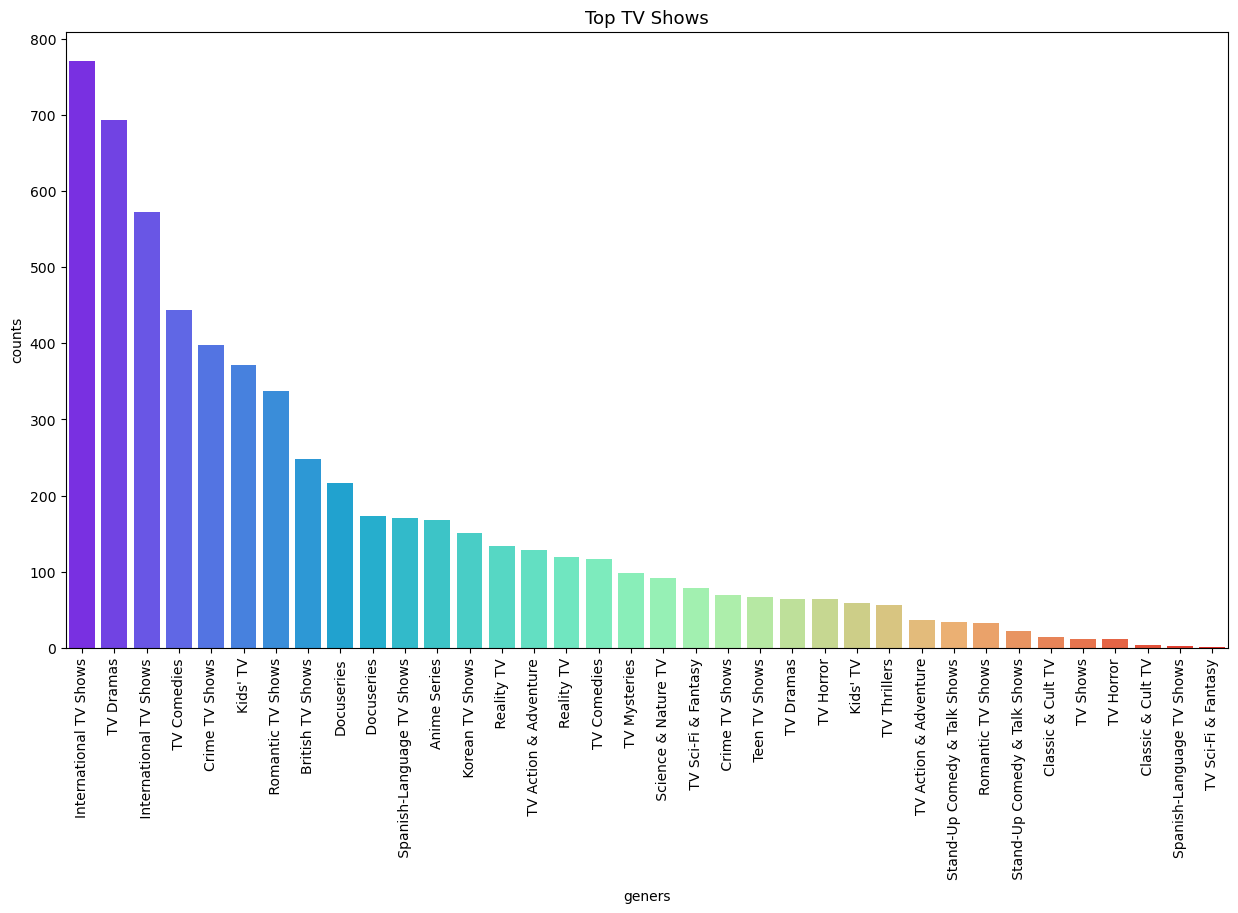

In [301]:
#Top Genre TV Shows

tvshow_genre=df.loc[df['type']=='TV Show']
count_genre= tvshow_genre['genre'].str.split(',').explode()

count_tvgenre=count_genre.value_counts().reset_index()
count_tvgenre.columns=['geners','counts']

plt.figure(figsize=(15,8))
sns.barplot(x='geners',y='counts',data=count_tvgenre,palette='rainbow')    
plt.xticks(rotation=90) 
plt.title('Top TV Shows',fontsize=13)
plt.show()          


C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\2154561571.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='director',y='count',data=most_movie_director,palette='rainbow')


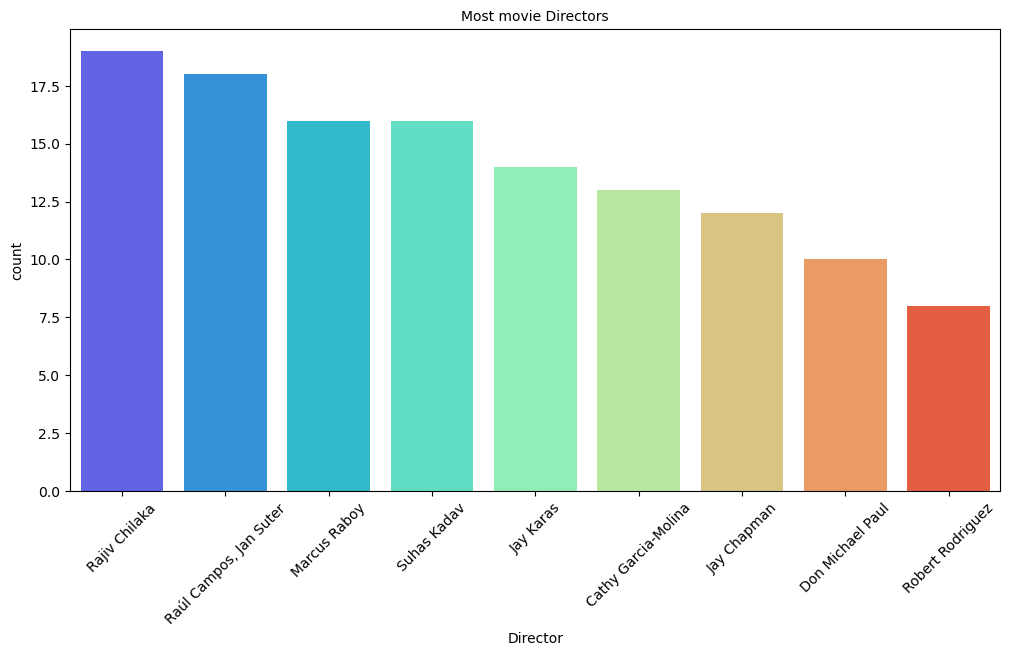

In [295]:
#Directoe with most no.of movies done

most_movie_director=df['director'].value_counts().reset_index()
most_movie_director=most_movie_director.sort_values(by='count',ascending=False).head(10)
most_movie_director=most_movie_director[1:]


plt.figure(figsize=(12,6))
plt.title('Most movie Directors',fontsize=10)
sns.barplot(x='director',y='count',data=most_movie_director,palette='rainbow')
plt.xticks(rotation =45)
plt.xlabel('Director',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.show()

C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\1698532742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='director',y='count',data=tv_show_director,palette='rainbow')


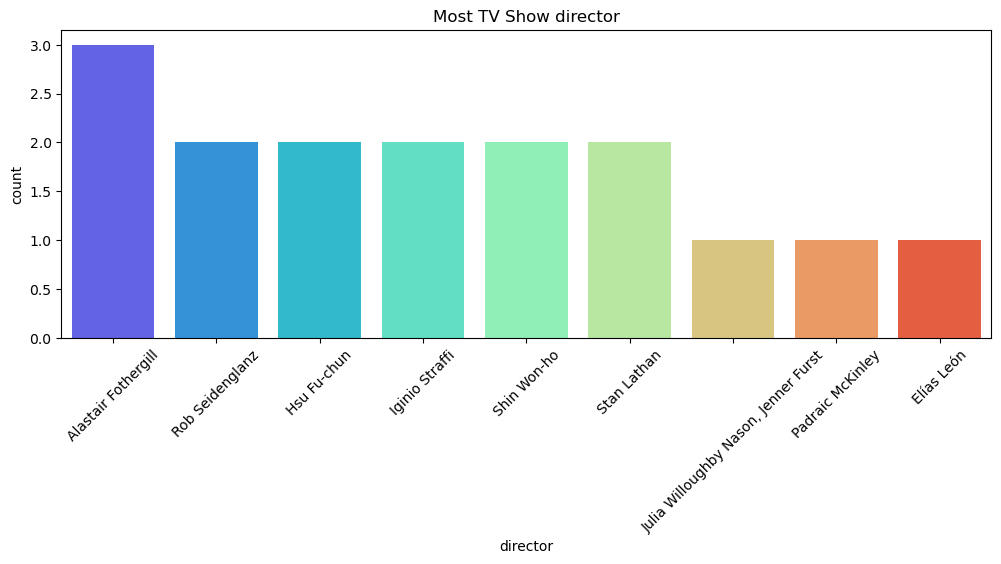

In [222]:
df.head()
tv_show_director=df.loc[df['type']=='TV Show']
tv_show_director=tv_show_director['director'].value_counts().reset_index()
tv_show_director.sort_values(by='count',ascending=False)
tv_show_director=tv_show_director.head(10)[1:]
tv_show_director

plt.figure(figsize=(12,4))
sns.barplot(x='director',y='count',data=tv_show_director,palette='rainbow')
plt.xticks(rotation=45)
plt.title('Most TV Show director')
plt.show()

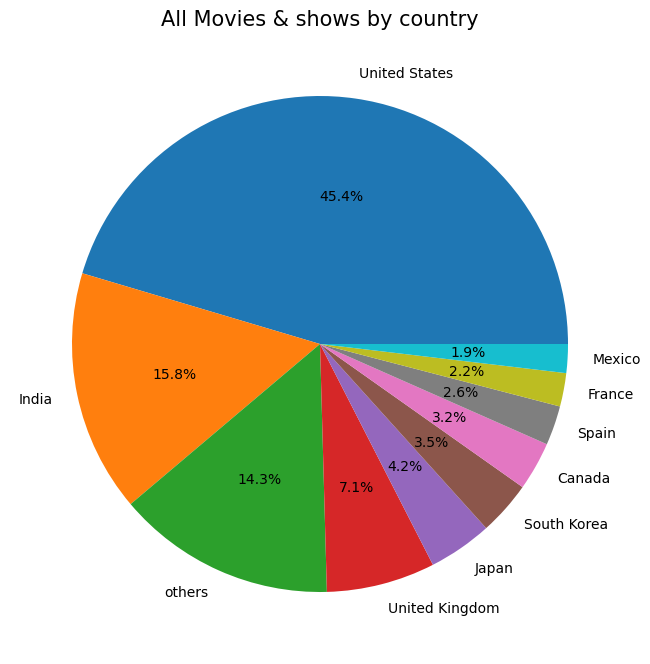

In [289]:
#movies by countries

country_movies=df['country'].value_counts().reset_index()
country_movies['country']=country_movies['country'].replace('unknown','others')
country_movies=country_movies.sort_values(by='count',ascending=False).head(10)


plt.figure(figsize=(8,13))
plt.title('All Movies & shows by country',fontsize=15)
plt.pie(country_movies['count'],labels=country_movies['country'],autopct='%1.1f%%')
plt.show()

C:\Users\yash1\AppData\Local\Temp\ipykernel_8624\566786593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year',y='count',data= most_movie_releaseyear,palette='viridis')


<Axes: xlabel='release_year', ylabel='count'>

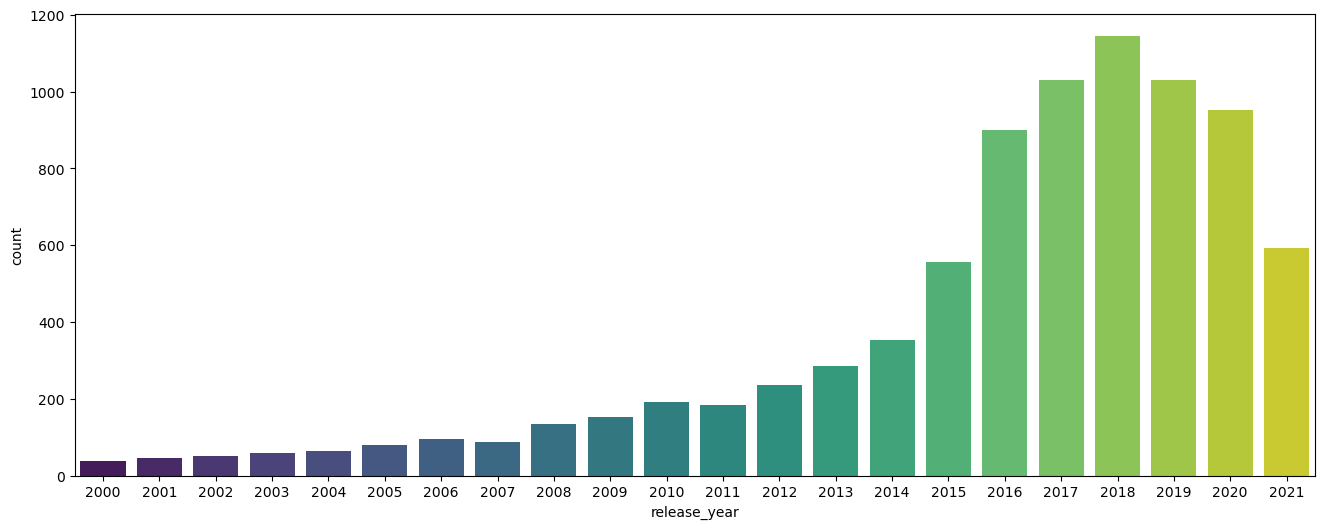

In [369]:
movie_count=df['release_year'].value_counts().reset_index()
most_movie_releaseyear=movie_count.sort_values(by='release_year',ascending=False)
most_movie_releaseyear
plt.figure(figsize=(16,6))
sns.barplot(x='release_year',y='count',data= most_movie_releaseyear,palette='viridis')
